# Практическое занятие по теме регрессия

Задача регрессии это задача обучения с учителем, в которой необходимо предсказать значение целевой переменной, имеющей непрерывный характер. Примеры: предсказание температуры, курса акций.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Создадим набор точек с которыми будем работать.

In [218]:
xs = np.linspace(0, 20, 1000)
ys = np.power(xs, 2) + (np.random.random(1000)*2-1)*50

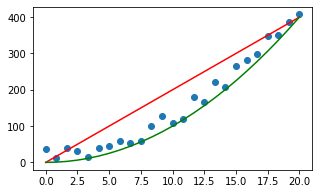

In [147]:
plt.figure(figsize=(5, 3))
plt.scatter(xs, ys)
plt.plot([0,20],[0,400], c='r')
plt.plot(xs, xs**2, c='g')
plt.show()

In [149]:
xs[0], ys[0]

(0.0, 36.92182618959825)

Создадим модель линейной регрессии.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [154]:
lr.fit(xs.reshape(-1,1), ys)

LinearRegression()

У нас единственный признак (абсцисса), поэтому формула искомой линии это уравнение прямой

$$
y(x) = Ax+B
$$

In [155]:
lr.coef_, lr.intercept_

(array([20.02447969]), -41.86495740535068)

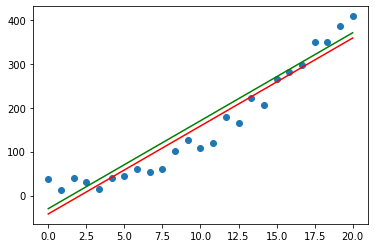

In [158]:
plt.scatter(xs, ys)
plt.plot(xs, xs*lr.coef_ + lr.intercept_, c='r')
plt.plot(xs, lr.predict(xs.reshape(-1,1))+12, c='g')
plt.show()

При вызове на вход методу fit необходимо подавать признаки объектов, являющиеся массивами. Поэтому необходимо применить метод reshape(-1,1), как он работает показано ниже.

In [150]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [34]:
type(a)

numpy.ndarray

In [35]:
a.shape

(6,)

In [153]:
a.reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [42]:
xs.reshape(-1, 1)

array([[ 0.        ],
       [ 0.83333333],
       [ 1.66666667],
       [ 2.5       ],
       [ 3.33333333],
       [ 4.16666667],
       [ 5.        ],
       [ 5.83333333],
       [ 6.66666667],
       [ 7.5       ],
       [ 8.33333333],
       [ 9.16666667],
       [10.        ],
       [10.83333333],
       [11.66666667],
       [12.5       ],
       [13.33333333],
       [14.16666667],
       [15.        ],
       [15.83333333],
       [16.66666667],
       [17.5       ],
       [18.33333333],
       [19.16666667],
       [20.        ]])

$$
y(x) = Ax^2 + Bx + C
$$

Давайте попробуем добавить еще один признак - квадраты xs. Для этого используем numpy.c_

In [51]:
xs

array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
        4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
        8.33333333,  9.16666667, 10.        , 10.83333333, 11.66666667,
       12.5       , 13.33333333, 14.16666667, 15.        , 15.83333333,
       16.66666667, 17.5       , 18.33333333, 19.16666667, 20.        ])

In [160]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.c_[a,b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [161]:
xs_new = np.c_[xs, xs**2]

In [162]:
xs_new.shape

(25, 2)

In [163]:
xs_new[:5]

array([[ 0.        ,  0.        ],
       [ 0.83333333,  0.69444444],
       [ 1.66666667,  2.77777778],
       [ 2.5       ,  6.25      ],
       [ 3.33333333, 11.11111111]])

In [164]:
lr2 = LinearRegression().fit(xs_new, ys)

In [165]:
lr2.coef_, lr2.intercept_

(array([-0.02575098,  1.00251153]), 22.18439056833904)

In [169]:
lr2.predict(xs_new)

array([ 22.18439057,  22.85911998,  24.92622653,  28.3857102 ,
        33.237571  ,  39.48180894,  47.118424  ,  56.1474162 ,
        66.56878552,  78.38253197,  91.58865556, 106.18715627,
       122.17803411, 139.56128908, 158.33692119, 178.50493042,
       200.06531678, 223.01808027, 247.3632209 , 273.10073865,
       300.23063353, 328.75290554, 358.66755468, 389.97458095,
       422.67398435])

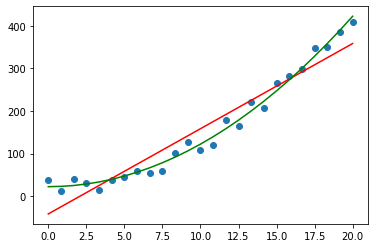

In [170]:
plt.scatter(xs, ys)
plt.plot(xs, lr.predict(xs.reshape(-1,1)), c='r')
plt.plot(xs, lr2.predict(xs_new), c='g')
plt.show()

In [73]:
lr.score(xs.reshape(-1,1), ys)

0.8822792538350052

In [74]:
lr2.score(xs_new, ys)

0.9518949618743805

Видим, что добавление одного признака (квадрата признака) привело к существенному улучшению качества работы модели. Логично было бы продолжать увеличивать количество признаков, добавить кубы и более высокие степени. Однако этот путь является ошибочным, давайте разберемся почему.

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [171]:
xs[:5]

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333])

In [172]:
xs.shape

(25,)

In [220]:
r = PolynomialFeatures(25).fit_transform(xs.reshape(-1,1))

In [208]:
r.shape

(1000, 26)

In [188]:
r[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.33333333e-01, 6.94444444e-01, 5.78703704e-01,
        4.82253086e-01, 4.01877572e-01, 3.34897977e-01, 2.79081647e-01,
        2.32568039e-01, 1.93806699e-01, 1.61505583e-01, 1.34587986e-01,
        1.12156655e-01, 9.34638790e-02, 7.78865658e-02, 6.49054715e-02,
        5.40878929e-02, 4.50732441e-02, 3.75610368e-02, 3.13008640e-02,
        2.60840533e-02, 2.17367111e-02, 1.81139259e-02, 1.50949383e-02,
        1.25791152e-02, 1.04825960e-02],
       [1.00000000e+00, 1.66666667e+00, 2.77777778e+00

In [221]:
model = LinearRegression().fit(r, ys)

In [190]:
model.coef_

array([ 3.62361745e-19,  3.25017098e-21, -3.12001593e-24,  6.39582678e-27,
        1.34940161e-28,  1.42713730e-28,  1.56399723e-27,  1.67542400e-26,
        1.75408688e-25,  1.78953524e-24,  1.77122234e-23,  1.69058263e-22,
        1.54362335e-21,  1.33376802e-20,  1.07428991e-19,  7.89230155e-19,
        5.11382232e-18,  2.76116883e-17,  1.11071243e-16,  2.45096278e-16,
       -9.08636565e-17,  1.32023547e-17, -1.00758217e-18,  4.29663506e-20,
       -9.73338385e-22,  9.16149834e-24])

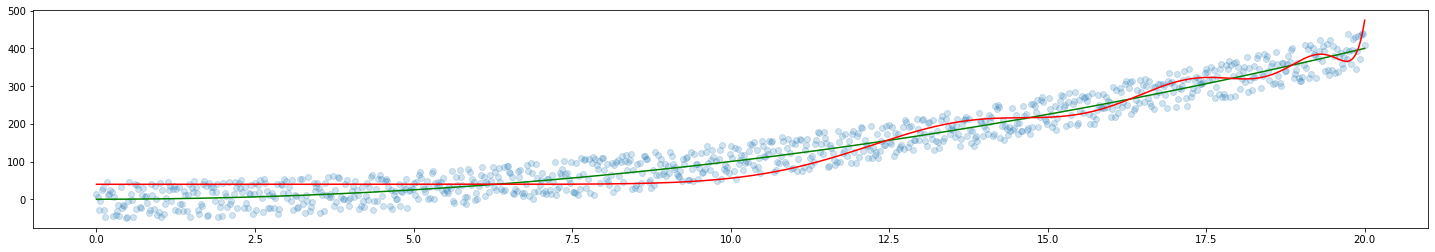

In [229]:
plt.figure(figsize=[25,4])
plt.scatter(xs, ys, alpha=0.2)
plt.plot(xs, xs**2, c='g')
plt.plot(xs, model.predict(r), c='r')
plt.show()

Оказывается полином 25-й степени показывает результаты хуже, чем квадратичная функция. Это объясняется тем, что модель с большим количеством признаков старается как можно лучше "подстроиться" к данным для обучения и возникает эффект "переобучения". При переобучении модель хорошо работает на известных ей данных и плохо на новых, незнакомых данных.

Чтобы диагностировать переобучение надо делить имеющиеся данные на тренировочные и тестовые. Как только при росте на train вы увидите падение качества на test - случилось переобучение.

Для разделения можно использовать train_test_split.

In [195]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(r, 
                                                    ys,
                                                    test_size=0.2)

In [210]:
X_train.shape, X_test.shape

((800, 26), (200, 26))

In [211]:
LinearRegression().fit(X_train, y_train).score(X_train, y_train)

0.9443528068827163

In [212]:
LinearRegression().fit(X_train, y_train).score(X_test, y_test)

0.9396302862134182

Видим, что на тестовых данные результат хуже, чем на тренировочных.

Для борьбы с переобучением на линейной регрессии используются методы Ridge и Lasso.

In [133]:
from sklearn.linear_model import Ridge, Lasso

In [223]:
model1 = Lasso(alpha=10).fit(r, ys)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.361e+05, tolerance: 1.513e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


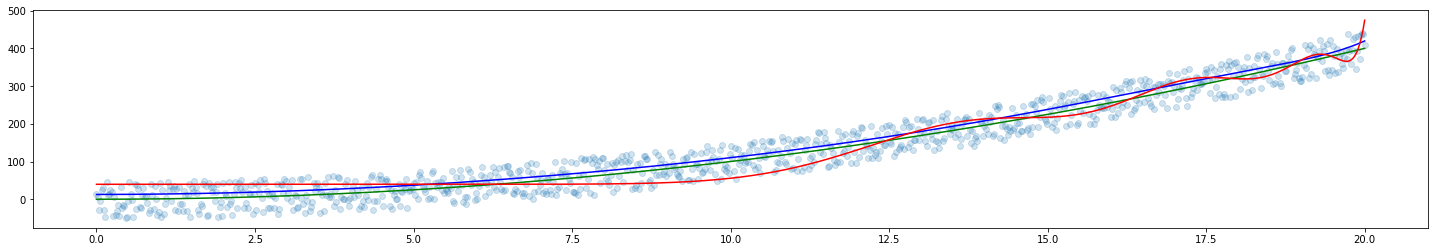

In [227]:
plt.figure(figsize=[25,4])
plt.scatter(xs, ys, alpha=0.2)
plt.plot(xs, xs**2, c='g')
plt.plot(xs, model1.predict(r)+10, c='b')
plt.plot(xs, model.predict(r), c='r')
plt.show()

Из графика видим, что Lasso показал лучше результат, чем простая линейная регрессия. 